In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
#load or read the dataset

data = pd.read_csv('powerplant.csv',delimiter=';')
data

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [3]:
#checking the number of rows and columns

data.shape

(9568, 5)

In [4]:
#checking for datatypes

data.dtypes

temperature          float64
exhaust_vacuum       float64
amb_pressure         float64
r_humidity           float64
energy_production    float64
dtype: object

In [5]:
#checking for columns in the dataset

data.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

In [6]:
#first few rows of the dataset

data.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [7]:
#checking the summary of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [8]:
#checking for the null values in the dataset

data.isnull().any()

temperature          False
exhaust_vacuum       False
amb_pressure         False
r_humidity           False
energy_production    False
dtype: bool

In [9]:
#checking statistics of numerical columns

data.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [10]:
#checking for correlation

data.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


<Axes: >

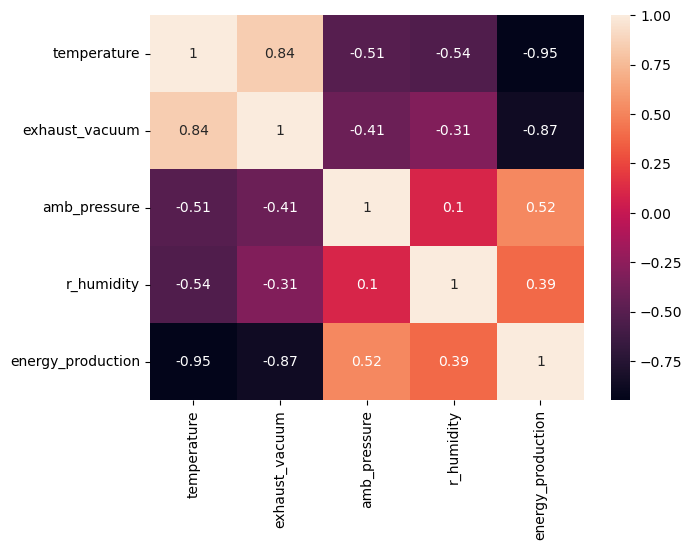

In [11]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot = True)

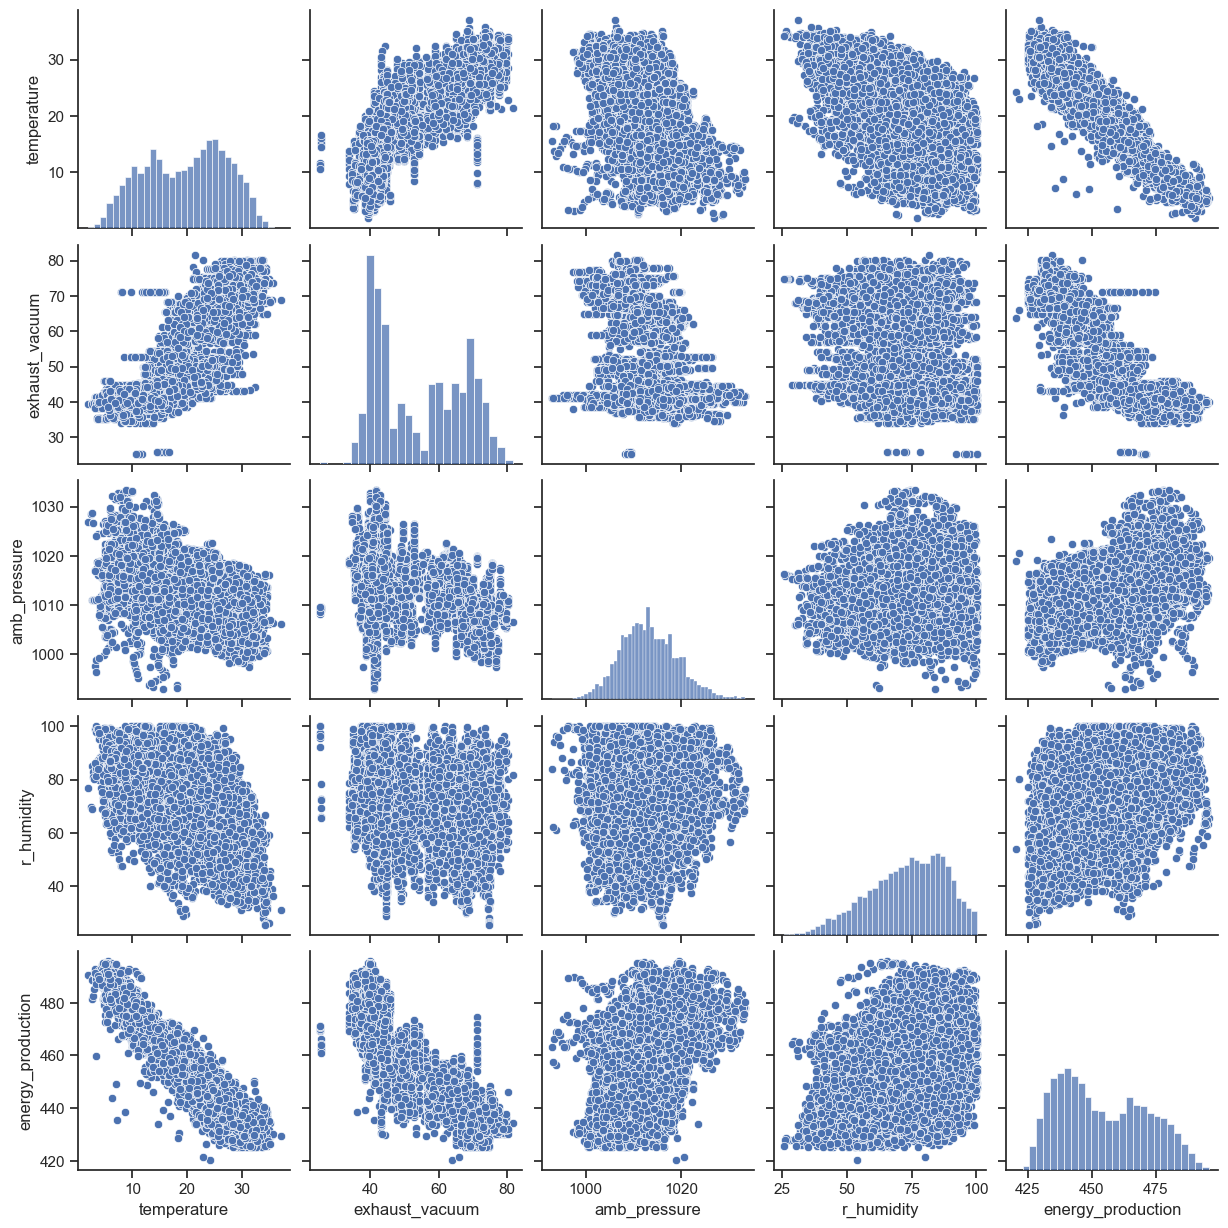

In [12]:
sns.set(style = "ticks")
sns.pairplot(data, diag_kind = 'hist')

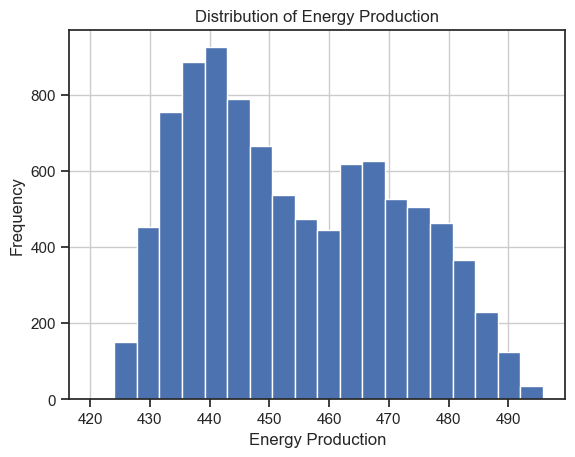

In [13]:
#explore the distribution of the target variable  "energy_production" with a histogram

data['energy_production'].hist(bins = 20)
plt.xlabel('Energy Production')
plt.ylabel('Frequency')
plt.title('Distribution of Energy Production')
plt.show()

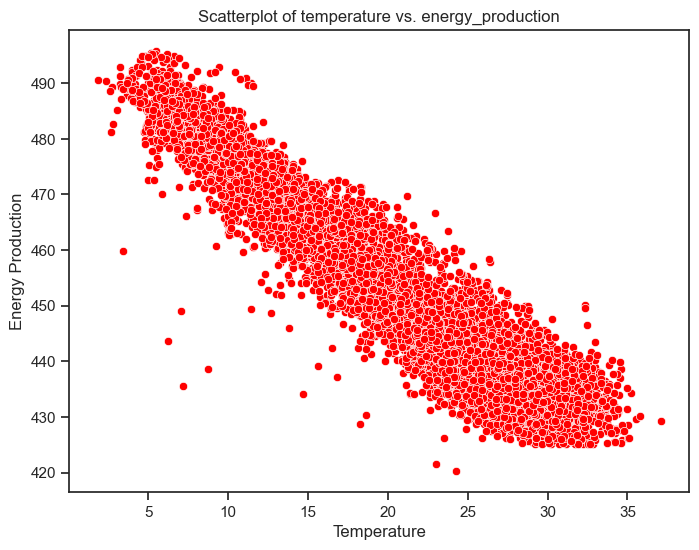

In [14]:
#checking the relationships between variables

plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='energy_production', data=data, color = 'red')
plt.title('Scatterplot of temperature vs. energy_production')
plt.xlabel('Temperature')
plt.ylabel('Energy Production')
plt.show()

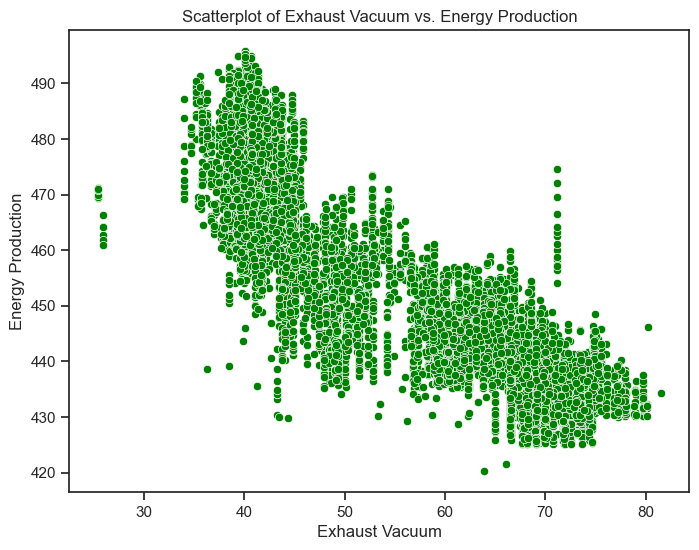

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='exhaust_vacuum', y='energy_production', data=data, color = 'green')
plt.title('Scatterplot of Exhaust Vacuum vs. Energy Production')
plt.xlabel('Exhaust Vacuum')
plt.ylabel('Energy Production')
plt.show()

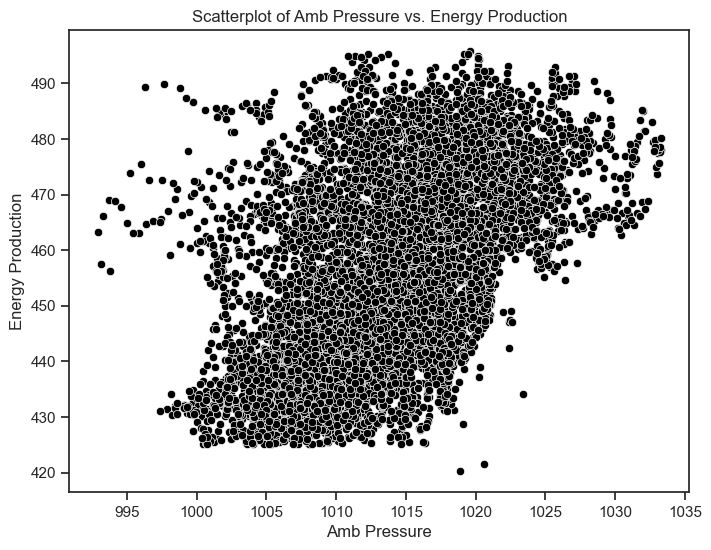

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='amb_pressure', y='energy_production', data=data, color = 'black')
plt.title('Scatterplot of Amb Pressure vs. Energy Production')
plt.xlabel('Amb Pressure')
plt.ylabel('Energy Production')
plt.show()

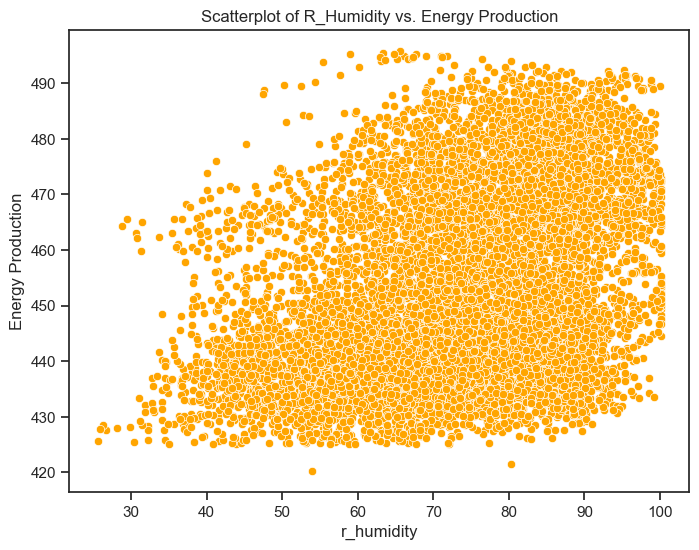

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='r_humidity', y='energy_production', data=data, color = 'orange')
plt.title('Scatterplot of R_Humidity vs. Energy Production')
plt.xlabel('r_humidity')
plt.ylabel('Energy Production')
plt.show()

In [18]:
# Check for duplicate rows based on all columns

duplicate_rows = data[data.duplicated()]

# Display the duplicate rows
print(duplicate_rows)

      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
2066        10.72           41.17       1019.68       60.71             479.21
2780        28.41           75.60       1018.48       56.07             440.28
3333        24.79           75.60       1017.07       68.23             440.05
3467         7.64           41.17       1020.01       75.14             488.53
3550        25.42           75.60       1017.39       77.63             438.24
3747        11.61           41.17       1019.57       58.82             476.81
4292        12.27           41.17       1019.41       58.10             475.13
4528        24.63           59.57       1010.45       85.36             440.67
5065         8.57           41.17       1020.18       72.47             484.20
5564        11.82           41.17       1019.50       55.74             475.61
5812        25.21           75.60       1017.19       69.84             445.84
5975         7.87           41.17       1020.33     

In [19]:
#drop the duplicates

data.drop_duplicates()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


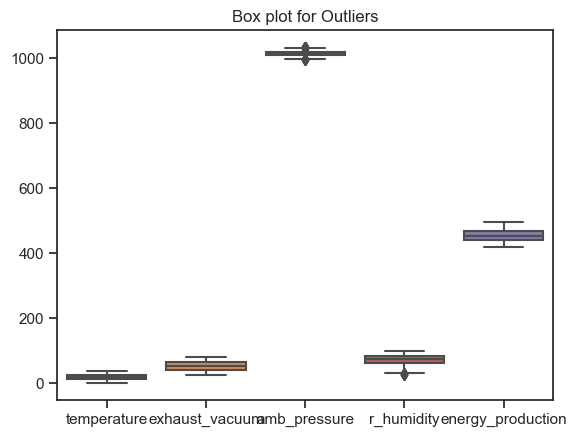

In [20]:
#checking for outliers 

sns.boxplot(data = data)
plt.title('Box plot for Outliers')
plt.show()

In [21]:
#removing the outliers

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers

filtered_data = data[((data >= lower_bound) & (data <= upper_bound)).all(axis=1)]

# Describe the filtered data to check for outliers removal

filtered_data.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9468.000000,9468.00000,9468.000000,9468.000000,9468.000000
mean,19.719883,54.41369,1013.148802,73.322083,454.209298
std,7.427311,12.70141,5.704623,14.551203,17.029285
min,1.810000,25.36000,996.870000,31.150000,420.260000
25%,13.577500,41.74000,1009.090000,63.285000,439.697500
50%,20.500000,52.72000,1012.900000,74.980000,451.210000
75%,25.760000,66.54000,1017.170000,84.840000,468.190000
max,37.110000,81.56000,1029.410000,100.160000,495.760000


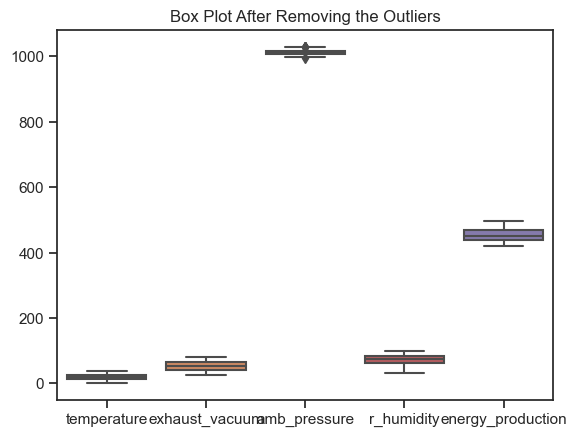

In [22]:
#After removing the outliers

sns.boxplot(data = filtered_data)
plt.title('Box Plot After Removing the Outliers')
plt.show()

In [23]:
#create a MinMaxScaler instance

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

In [24]:
#check the minimum and maximum values of the normalized data

min_normalized = normalized_data.min(axis = 0)
max_normalized = normalized_data.max(axis = 0)

In [25]:
print("Minimum values after Min-Max Scaling:", min_normalized)
print("Maximum values after Min-Max Scaling:", max_normalized)

Minimum values after Min-Max Scaling: [0. 0. 0. 0. 0.]
Maximum values after Min-Max Scaling: [1. 1. 1. 1. 1.]


In [26]:
#preparing the data for the model

x = data.drop('energy_production', axis = 1).values
y = data['energy_production'].values
print(x)
print(y)

[[   9.59   38.56 1017.01   60.1 ]
 [  12.04   42.34 1019.72   94.67]
 [  13.87   45.08 1024.42   81.69]
 ...
 [  30.44   56.24 1005.19   56.24]
 [  23.     66.05 1020.61   80.29]
 [  17.75   49.25 1020.86   63.67]]
[481.3  465.36 465.48 ... 429.34 421.57 454.41]


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 4)
(1914, 4)
(7654,)
(1914,)


In [29]:
#Linear Regression Model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [30]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = regressor.predict(x_test)
y_pred

array([482.14379172, 446.62545543, 470.88264856, ..., 438.83235575,
       467.15765815, 450.80459627])

In [32]:
mse = mean_squared_error(y_test, y_pred)
mse

19.41546272147952

In [33]:
rmse = np.sqrt(mse)
rmse

4.406298074515559

In [34]:
mae = mean_absolute_error(y_test, y_pred)
mae

3.5499908529259105

In [35]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9336619944003097

In [36]:
print('rsme: ', rmse)
print('mae: ', mae)
print('r_squared: ', r_squared)

rsme:  4.406298074515559
mae:  3.5499908529259105
r_squared:  0.9336619944003097


In [37]:
print("Linear Regression:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r_squared:.4f}")

Linear Regression:
RMSE: 4.41
MAE: 3.55
R-squared: 0.9337


In [38]:
# Decision Tree Regression

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [40]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [41]:
y_pred = dtr.predict(x_test)
y_pred

array([490.76, 443.51, 477.51, ..., 445.37, 470.03, 447.67])

In [42]:
mse = mean_squared_error(y_test, y_pred)
mse

19.459736677115988

In [43]:
rmse = np.sqrt(mse)
rmse

4.411319153849106

In [44]:
mae = mean_absolute_error(y_test, y_pred)
mae

3.0323824451410655

In [45]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9335107208530826

In [46]:
print('rmse: ', rmse)
print('mae: ', mae)
print('r_squared: ', r_squared)

rmse:  4.411319153849106
mae:  3.0323824451410655
r_squared:  0.9335107208530826


In [47]:
print('Decision Tree Regression:')
print(f'rmse: {rmse: .2f}')
print(f'mae: {mae: .2f}')
print(f'r_squared: {r_squared: .4f}')

Decision Tree Regression:
rmse:  4.41
mae:  3.03
r_squared:  0.9335


In [48]:
# Random Forest Regression

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [50]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [51]:
y_pred = rfr.predict(x_test)
y_pred

array([489.638 , 442.731 , 475.2648, ..., 435.6757, 467.3292, 452.185 ])

In [62]:
import pickle
pickle.dump(rfr, open('rfr_model.pkl', 'wb'))

In [63]:
rfr_pickled_model = pickle.load(open('rfr_model.pkl', 'rb'))

In [61]:
rfr_pickled_model.predict(x_test)

array([489.638 , 442.731 , 475.2648, ..., 435.6757, 467.3292, 452.185 ])

In [54]:
mse = mean_squared_error(y_test, y_pred)
mse

10.163329988134779

In [55]:
rmse = np.sqrt(mse)
rmse

3.187997802404321

In [56]:
mae = mean_absolute_error(y_test, y_pred)
mae

2.3304970219435717

In [57]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.965274325349017

In [58]:
print('rmse: ', rmse)
print('mae: ', mae)
print('r_squared: ', r_squared)

rmse:  3.187997802404321
mae:  2.3304970219435717
r_squared:  0.965274325349017


In [59]:
print('Decision Tree Regression:')
print(f'rmse: {rmse: .2f}')
print(f'mae: {mae: .2f}')
print(f'r_Squared: {r_squared: .4f}')

Decision Tree Regression:
rmse:  3.19
mae:  2.33
r_Squared:  0.9653


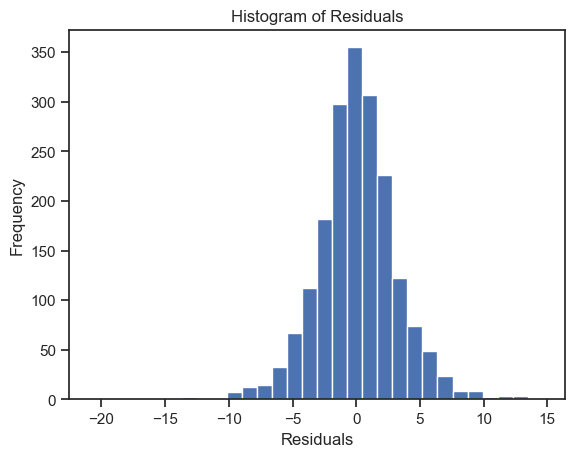

In [60]:
# Histogram of residuals : This helps to check if the residuals are normally distributed

residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()